# Harris's Economic Order Quantity Model

We use this model throughout our documentation so we want to make sure how `econsa` is useful in its analysis. We simply import the core function from `temfpy`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import chaospy as cp
import numpy as np

In [2]:
from temfpy.uncertainty_quantification import eoq_harris

We start with the uncertainty propagation. First, we need to generate the data from uniform distribution. To obtain uncertainty, we use the `sample` function from `chaospy`.

In [3]:
# Set seed for reproducible results
seed = 123

# Number of draws
n = 10000

# Set the means for input variables
m_0 = 1230
s_0 = 0.0135
c_0 = 2.15

# Set the range of draws
x_min_multiplier = 0.9
x_max_multiplier = 1.1

r = 0.1

In [4]:
# Generate model inputs
np.random.seed(seed)
m = cp.Uniform(x_min_multiplier * m_0, x_max_multiplier * m_0).sample(n, rule="random")
s = cp.Uniform(x_min_multiplier * s_0, x_max_multiplier * s_0).sample(n, rule="random")
c = cp.Uniform(x_min_multiplier * c_0, x_max_multiplier * c_0).sample(n, rule="random")

x = np.array([m, s, c])

In [5]:
# Calculate model output
y = eoq_harris(x, r)

Now, that we have all the data, we can plot the graphs.

First we plot the heoretical densities for $X$. This is 

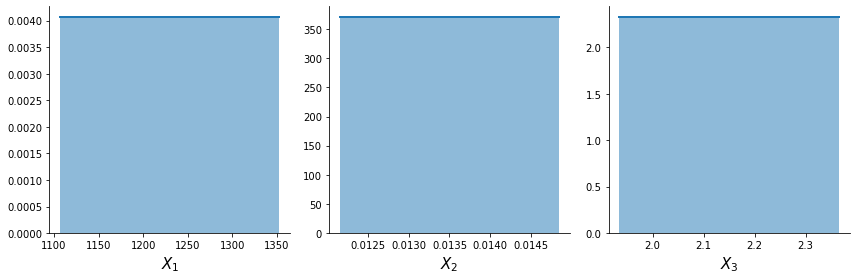

In [6]:
# Create the plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# X1
h_m = 1 / (x_max_multiplier * m_0 - x_min_multiplier * m_0)
ax[0].plot([x_min_multiplier * m_0, x_max_multiplier * m_0], [h_m, h_m], linewidth=2)
ax[0].fill(
    [
        x_min_multiplier * m_0,
        x_min_multiplier * m_0,
        x_max_multiplier * m_0,
        x_max_multiplier * m_0,
    ],
    [0, h_m, h_m, 0],
    alpha=0.5,
)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel(r"$X_1$")

# X2
h_s = 1 / (x_max_multiplier * s_0 - x_min_multiplier * s_0)
ax[1].plot([x_min_multiplier * s_0, x_max_multiplier * s_0], [h_s, h_s], linewidth=2)
ax[1].fill(
    [
        x_min_multiplier * s_0,
        x_min_multiplier * s_0,
        x_max_multiplier * s_0,
        x_max_multiplier * s_0,
    ],
    [0, h_s, h_s, 0],
    alpha=0.5,
)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel(r"$X_2$")

# X3
h_c = 1 / (x_max_multiplier * c_0 - x_min_multiplier * c_0)
ax[2].plot([x_min_multiplier * c_0, x_max_multiplier * c_0], [h_c, h_c], linewidth=2)
ax[2].fill(
    [
        x_min_multiplier * c_0,
        x_min_multiplier * c_0,
        x_max_multiplier * c_0,
        x_max_multiplier * c_0,
    ],
    [0, h_c, h_c, 0],
    alpha=0.5,
)
ax[2].set_ylim(bottom=0)
ax[2].set_xlabel(r"$X_3$")

# Show all labels
fig.tight_layout()

# Show the figure
plt.show()

# Alternatively, save the figure as .png file
# fig.savefig("fig-borgonovo-cdf-x")

And plot the empirical density for $y$:

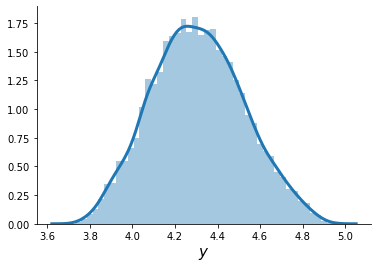

In [7]:
fig, ax = plt.subplots()
sns.distplot(y)
ax.set_xlabel(r"$y$")

# Show the figure
plt.show()

# Alternatively, save the figure as .png file
# fig.savefig("fig-borgonovo-cdf-y")

## Resources

* Harris, F. W. (1990). How many parts to make at once. Operations Research, 38(6), 947–950. https://doi.org/10.1287/opre.38.6.947
* Borgonovo, E., & Plischke, E. (2016). Sensitivity analysis: A review of recent advances. European Journal of Operational Research, 248(3), 869–887. https://doi.org/10.1016/j.ejor.2015.06.032